/data2/Gaurav/Babu/Langchain/lang/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Token indices sequence length is longer than the specified maximum sequence length for this model (233859 > 131072). Running this sequence through the model will result in indexing errors


Max tokens: 233859
Min tokens: 18
Avg tokens: 2587.28


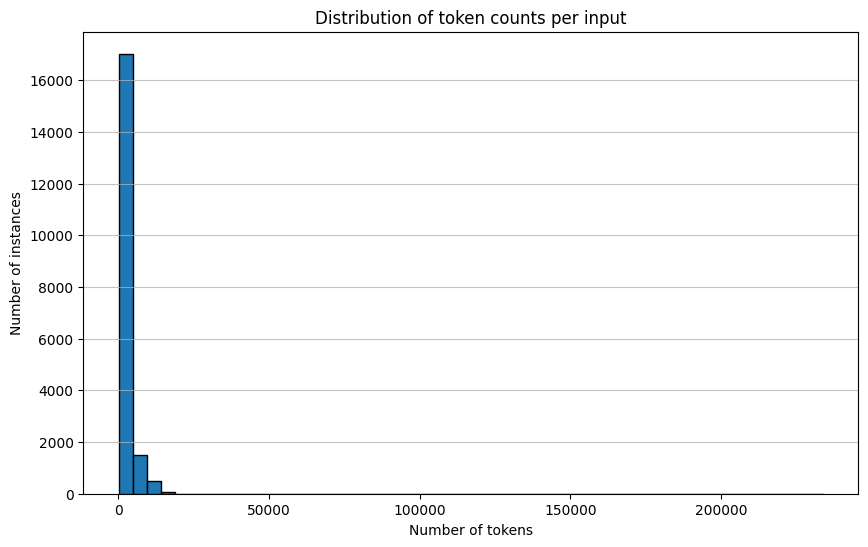

In [1]:
import json
from statistics import mean
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

# Load tokenizer for LLaMA-8B
tokenizer = AutoTokenizer.from_pretrained("meta-llama/Llama-3.1-8B-Instruct")

# Load dataset
with open("../LLaMA-Factory/data/xfact_train_with_sentence_level_chunked_retrieved_evidence.json", "r", encoding="utf-8") as f:
    data = json.load(f)

# Count tokens for each "input"
token_counts = []
for item in data:
    text = item["input"]
    tokens = tokenizer.encode(text, add_special_tokens=False)
    token_counts.append(len(tokens))

# Compute stats
max_tokens = max(token_counts)
min_tokens = min(token_counts)
avg_tokens = mean(token_counts)

print(f"Max tokens: {max_tokens}")
print(f"Min tokens: {min_tokens}")
print(f"Avg tokens: {avg_tokens:.2f}")

# --- Plot histogram ---
plt.figure(figsize=(10, 6))
plt.hist(token_counts, bins=50, edgecolor="black")  # adjust bins as needed
plt.xlabel("Number of tokens")
plt.ylabel("Number of instances")
plt.title("Distribution of token counts per input")
plt.grid(axis="y", alpha=0.75)
plt.show()

